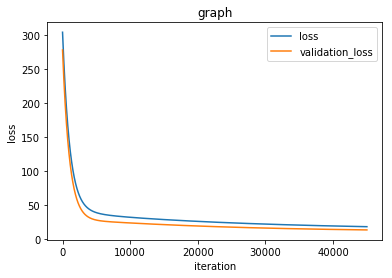

In [1]:
import numpy
import jupyter
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

def compute_loss(x, y, w):
    m = y.shape[0]
    C = x.dot(w) - y
    loss = (C.T.dot(C))/ (2*m)
    return loss

def gradient_descent(x, y, w, learning_rate, iteration, x_test, y_test):
    m = y.shape[0]
    loss_history = numpy.zeros((iteration, 1))
    test_loss_history = numpy.zeros((iteration, 1))
    for i in range(iteration):
        w = w - (learning_rate/m) * (x.T.dot(x.dot(w) - y))
        loss_history[i] = compute_loss(x, y, w)
        test_loss_history[i] = compute_loss(x_test, y_test, w)
    return loss_history, test_loss_history, w

x, y = load_svmlight_file("housing.txt")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train, x_test = x_train.toarray(), x_test.toarray()
y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))

iteration = 45000
learning_rate = 0.0001
w = numpy.zeros((14,1))
X_train = numpy.hstack([x_train, numpy.ones((x_train.shape[0], 1))])
X_test = numpy.hstack([x_test, numpy.ones((x_test.shape[0], 1))])

loss = compute_loss(X_train, y_train, w)
loss_history, test_loss_history, w = gradient_descent(X_train, y_train, w, learning_rate, iteration, X_test, y_test)

pyplot.plot(loss_history, label='loss')
pyplot.plot(test_loss_history, label='validation_loss')
pyplot.legend(loc='upper right')
pyplot.ylabel('loss')
pyplot.xlabel('iteration')
pyplot.title('graph')
pyplot.show()